# 04 - Clasificación con K-Nearest Neighbors

In [23]:
from os import O_TRUNC
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

import prediccion

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from statistics import mean

df = pd.DataFrame(pd.read_csv('mobile_price.csv'))


# Predicciones con el dataset original (K-Nearest Neighbors)

La primera prueba de rendimient del algoritmo KNeighborsClassifier se hara con el dataset original (osea el que no recibio eliminaciones de datos) . Luego pasaremos a realizar las mismas pruebas pero con el dataset limpiado. Este patron se va a repetir en el resto de los algoritmos de clasificacion. Asi que empecemos

In [24]:
from sklearn.neighbors import KNeighborsClassifier
algoPrediccion = prediccion.ClasificacionModelo(df)
algoPrediccion.clasificador = KNeighborsClassifier(n_neighbors = 391, metric = "minkowski", p = 1) 
algoPrediccion.df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.20,0,1,0,7,0.60,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.50,1,0,1,53,0.70,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.50,1,2,1,41,0.90,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.50,0,0,0,10,0.80,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.20,0,13,1,44,0.60,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.50,1,0,1,2,0.80,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.60,1,0,0,39,0.20,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.90,1,1,1,36,0.70,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.90,0,4,1,46,0.10,145,5,...,336,670,869,18,10,19,1,1,1,0


In [25]:
algoPrediccion.realizarEntrenamientoCompleto('price_range')

shape X_train (1600, 17)
shape X_test (400, 17)
shape y_train (1600, 1)
shape y_test (400, 1)


In [26]:
algoPrediccion.resultadoDeEntrenamiento().head(30)

,Actual,Prediccion,Error Absoluto,Error porcentual absoluto %
0,3,3,0,0.00
1,0,0,0,0.00
2,2,2,0,0.00
3,2,1,1,50.00
4,2,3,1,50.00
5,0,0,0,0.00
6,0,0,0,0.00
7,3,2,1,33.33
8,3,3,0,0.00
9,1,1,0,0.00


Cuando analizamos esta tabla, vemos que tenemos un gran numero de aciertos pero cuando falla lo hace a gran escala de su valor real

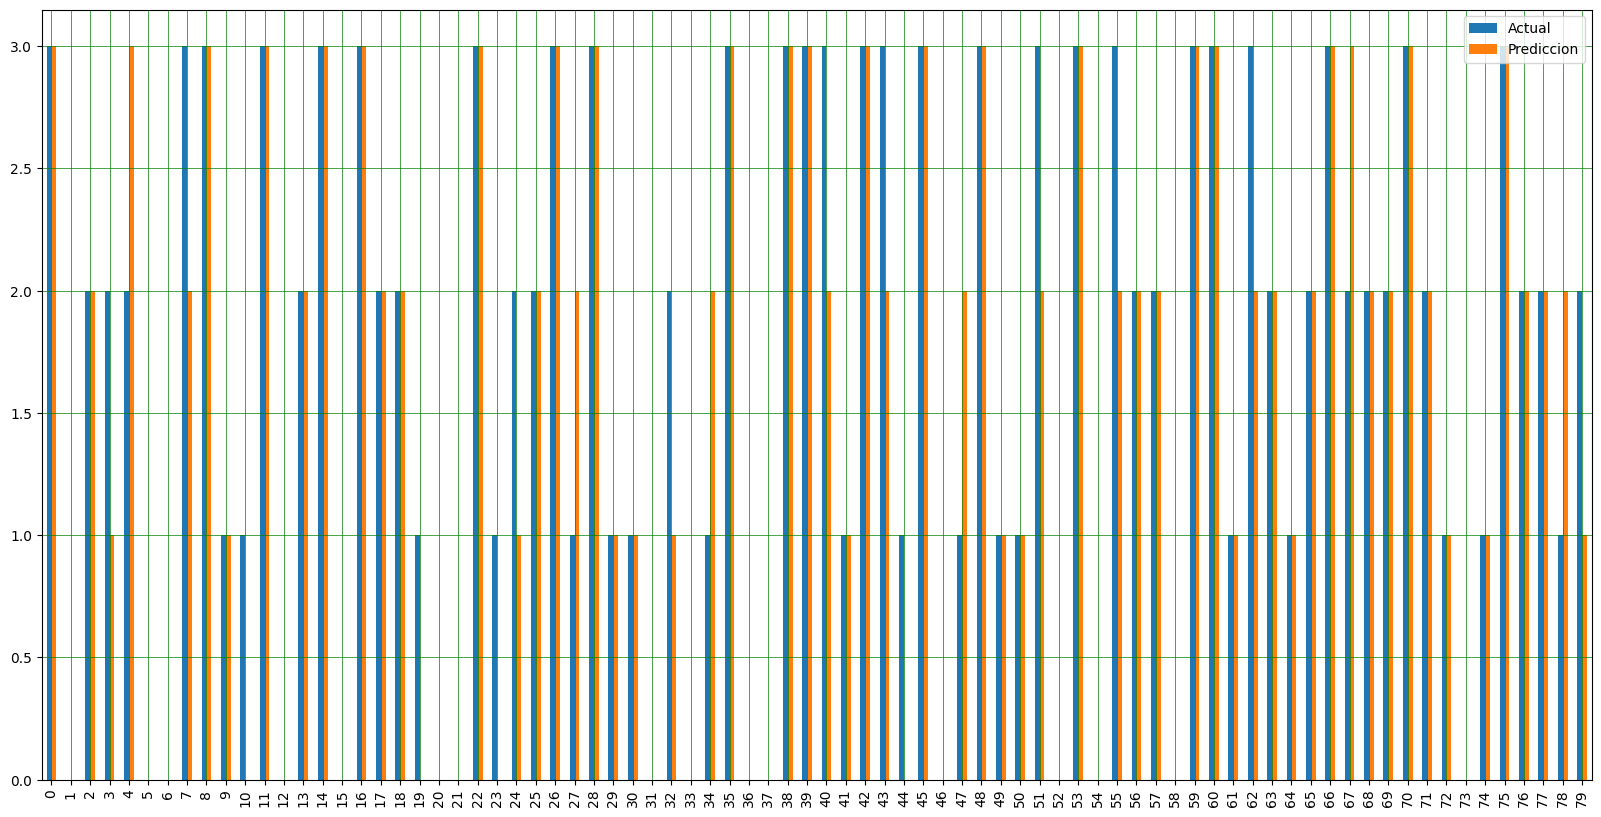

In [27]:
algoPrediccion.graficoComparativoBarras()

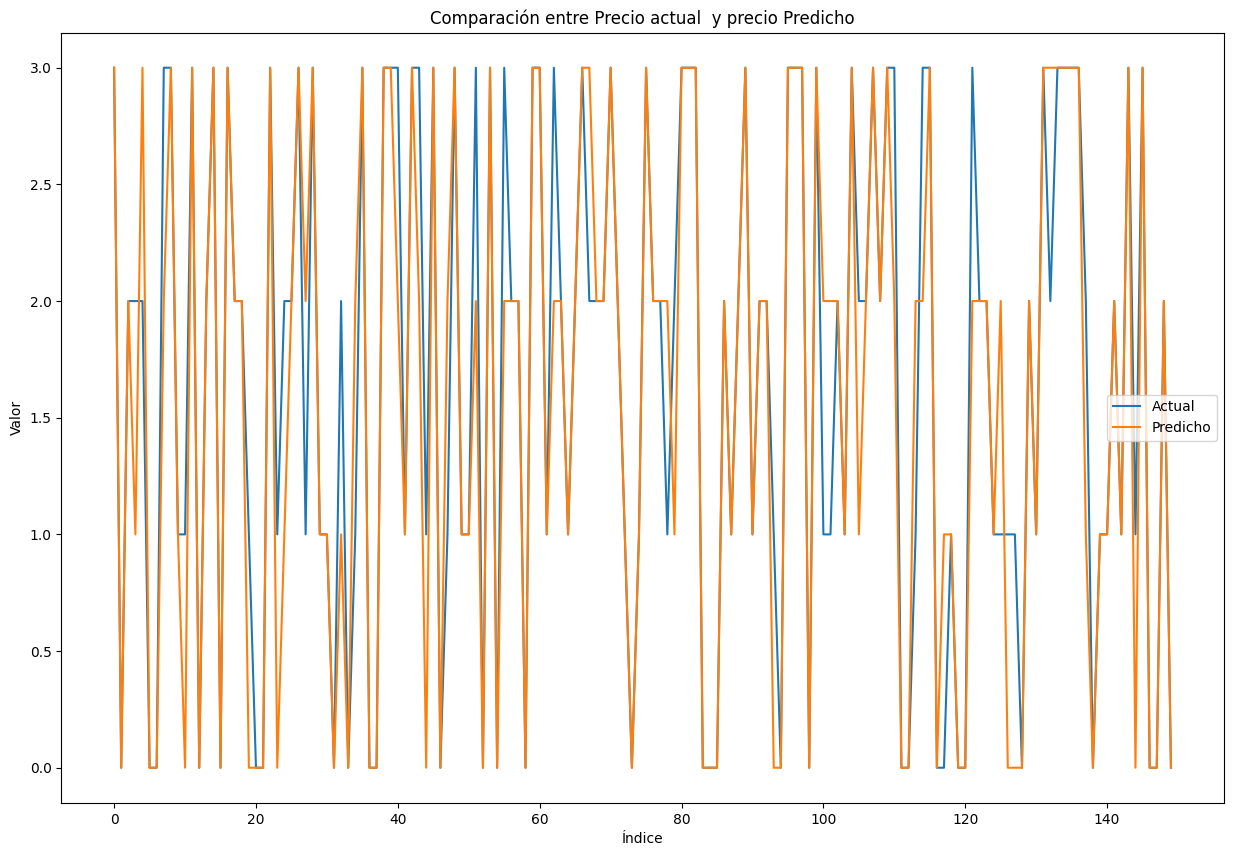

In [28]:
algoPrediccion.graficoComparativoLineas()

[[90  5  0  0]
 [13 60 19  0]
 [ 0 16 80  3]
 [ 0  0 18 96]]


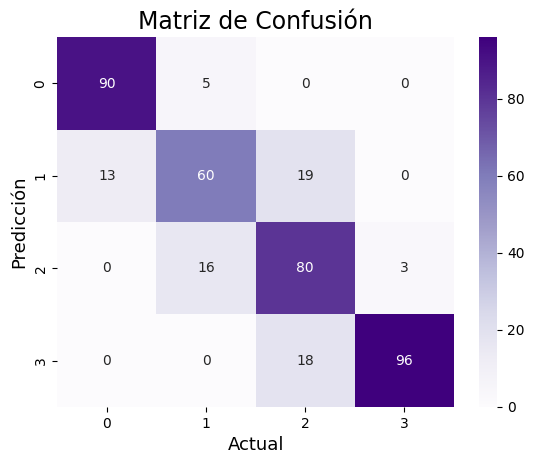

In [29]:
algoPrediccion.graficoMatrizDeConfusion()

La matriz de confusion nos dice que hemos acertado 326 en total de 400 casos lo que representa un 81.5% de aciertos como podemos ver que nos confirma la metrica accuracy de abajo

In [30]:
algoPrediccion.metricas()

              precision    recall  f1-score   support

           0     0.8738    0.9474    0.9091        95
           1     0.7407    0.6522    0.6936        92
           2     0.6838    0.8081    0.7407        99
           3     0.9697    0.8421    0.9014       114

    accuracy                         0.8150       400
   macro avg     0.8170    0.8124    0.8112       400
weighted avg     0.8235    0.8150    0.8157       400



Como podemos observar en la metrica de arriba,  los valores 1 y 2 han sido los que menos aciertos han obtenido en comparacion del resto... <br> <br>
 En lineas generales si observamos  el accuracy vemos que obtuvimos un resultado peor que con la regresion logistica (en el cual habiamos obtenido un 0.95 con los datos sin limpiar) . Para los valores o rango de precios de celulares 3 y 0 los resultados mejoran pero aun asi no superan los resultados obtenidos en la  regresion logistica. <br>

Recordemos que el accuracy representa la precisión general del modelo, es decir, la proporción de predicciones correctas sobre el total de predicciones realizadas. En este caso, se obtuvo un accuracy de 0.8150, lo que equivale al 81.50% de efectividad en las predicciones.

Esto significa que el algoritmo logra predecir correctamente el rango de precios de los celulares en la mayoría de los casos, pero con una tasa de error del 18.50%. Aunque existe un margen de error, el algoritmo aún puede realizar predicciones decentes en general.
<br> <br>
<hr>



# Predicciones con el dataset "limpiado"  (K-Nearest Neighbors)

Si bien realizamos una limpieza del dataset original ,hay que tener en cuenta que las pruebas que nos demotraban un empeoramiento o mejora de rendimiento las hicimos con el algoritmo de regresion logistica por lo que no necesariamente en todos los algoritmos de clasificacion restante vamos a mejorar el rendimiento sino que seguramente en muchos casos  empeoren. Hagamos las pruebas 

Primero importemos el dataset limpiado

In [31]:

df_limpìo = pd.DataFrame(pd.read_csv('mobile_price_limpiado.csv'))

In [32]:
algoPrediccion2 = prediccion.ClasificacionModelo(df_limpìo)
algoPrediccion2.clasificador = KNeighborsClassifier(n_neighbors = 391, metric = "minkowski", p = 1) 
algoPrediccion2.realizarEntrenamientoCompleto('price_range')

shape X_train (1408, 17)
shape X_test (353, 17)
shape y_train (1408, 1)
shape y_test (353, 1)


Para estos casos en donde vamos a realizar las predicciones con los datos limpios vamos directamente al grano con la metrica

In [33]:
algoPrediccion2.metricas()

              precision    recall  f1-score   support

           0     0.8174    0.9691    0.8868        97
           1     0.7931    0.4742    0.5935        97
           2     0.5946    0.8148    0.6875        81
           3     0.9275    0.8205    0.8707        78

    accuracy                         0.7649       353
   macro avg     0.7832    0.7697    0.7596       353
weighted avg     0.7839    0.7649    0.7569       353



Como podemos observar en la metrica de arriba, nuevamente los valores 1 y 2 han sido los que menos aciertos han obtenido en comparacion del resto solo que esta vez incluso los resultados son aun peores en comparacion cuando hicimos la misma prediccion pero con el dataset sin limpiar... <br> <br>

La precisión general del modelo (accuracy), es decir, la proporción de predicciones correctas sobre el total de predicciones realizadas, fue de un  0.7649 , lo que equivale  un 76% (redondeado) de efectividad en las predicciones por lo este algoritmo  no se vio beneficiado de la limpieza de datos , errando esta vez por un aproximado de 5% con el valor obtenido anteriormente sin la limpieza. Aun asi  el algoritmo logra predecir correctamente el rango de precios de los celulares en la mayoría de los casos, pero con una tasa de error mayor que es de 24% aproximadamente. Claramente este algoritmo no se vio beneficiado de la limpieza de datos . Habria que hacer el mismo analisis que se hizo para el algoritmo de regresion logistica para este algoritmo , para encontrar una forma de mejorar el rendimiento ,pero eso llevaria demasiado tiempo .

<hr><hr>